# TMDb movie data

## Analysis by: Aminat Owodunni

# Overview

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

# Aims and Objectives

This project aims to investigate this dataset and answer some specific questions.

## Research Questions

1.	What genres are the most frequent of all time?
2.	Which genres/movies are the most popular of all time?
3.	What genres/movies are most popular in the nineties?
4.	What genres/movies are most popular in the millennium?
5.	Which are the top-rated movies in the nineties?
6.	Which are the top-rated movies in the millennium?
7.	Which movie title had the highest budget?
8.	Which movie title had the longest run time?
9.	Which movie actors got the highest vote counts?
10.	How is revenue trending over the period of time?
11.	How runtime trends overtime?
12.	Do top ratings movies always generate big revenue?
13.	Do higher budget movies always generate big revenue?
14.	What movies generated big revenues?
15.	Can we provide a list of directors that generates big revenue?
16.	Can we provide a list of production company that generates big revenue?

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#checking for duplicates
df.duplicated().any()

True

In [6]:
df.duplicated().sum()

1

In [7]:
#dropping duplicates data
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(10865, 21)

# Exploratory Data Analysis (EDA)

**1. What genres are most frequent of all time?**

In [9]:
# popular genres
df[['genres','popularity']].value_counts(['genres'],ascending=False)

genres                            
Comedy                                712
Drama                                 712
Documentary                           312
Drama|Romance                         289
Comedy|Drama                          280
                                     ... 
Comedy|Romance|Music                    1
Comedy|Romance|Horror                   1
Comedy|Romance|Fantasy|Drama            1
Comedy|Romance|Crime|Drama|Mystery      1
Western|Thriller                        1
Length: 2039, dtype: int64

The most frequent genres were **comedy** and **Drama** with a count of **712**.

**2. What genres/movies are most popular of all time?**

In [10]:
# popular genres
df[['release_year','original_title','genres','popularity']].sort_values(['popularity'],ascending=False)

,release_year,original_title,genres,popularity
0,2015,Jurassic World,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,28.419936
629,2014,Interstellar,Adventure|Drama|Science Fiction,24.949134
630,2014,Guardians of the Galaxy,Action|Science Fiction|Adventure,14.311205
2,2015,Insurgent,Adventure|Science Fiction|Thriller,13.112507
...,...,...,...,...
6961,2006,Khosla Ka Ghosla!,Comedy,0.001115
6551,2005,Mon petit doigt m'a dit...,Comedy|Mystery,0.000973
6080,2013,G.B.F.,Comedy,0.000620
9977,1971,The Hospital,Mystery|Comedy|Drama,0.000188


The popular genres all the time are **Action|Adventure|Science Fiction|Thriller** movies. \ **Jurassic world** was the most popular with a score of **32.985763**.

**3. What genres/movies that are most popular in the nineties**?

In [11]:
#Top 20 polular genres/movies in the nineties
df_19gm = df[df['release_year']<=1999]
df_19gm[['release_year','original_title','genres','popularity']].sort_values(['popularity'],ascending=False).head(20)

,release_year,original_title,genres,popularity
1329,1977,Star Wars,Adventure|Action|Science Fiction,12.037933
2409,1999,Fight Club,Drama,8.947905
4177,1994,Pulp Fiction,Thriller|Crime,8.093754
2410,1999,The Matrix,Action|Science Fiction,7.753899
4178,1994,The Shawshank Redemption,Drama|Crime,7.192039
4179,1994,Forrest Gump,Comedy|Drama|Romance,6.715966
5230,1997,Eddie Izzard: Glorious,Comedy,6.668990
6081,1985,Back to the Future,Adventure|Comedy|Science Fiction|Family,6.095293
7269,1972,The Godfather,Drama|Crime,5.738034
7309,1980,The Empire Strikes Back,Adventure|Action|Science Fiction,5.488441


<AxesSubplot:title={'center':'Popularity Score of Top 20 movies in the nineties'}, xlabel='original_title'>

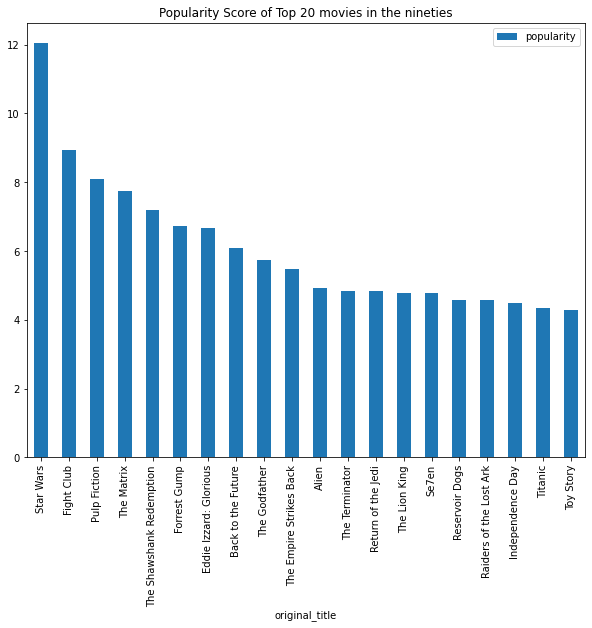

In [12]:
#Chart of Top 20 polular genres/movies in the nineties
df_19gm = df[df['release_year']<=1999]
df_19gm[['release_year','original_title','genres','popularity']].sort_values(['popularity'],ascending=False).head(20).plot(x='original_title', y='popularity', kind='bar', title = 'Popularity Score of Top 20 movies in the nineties', figsize=(10,8))

The most popular genres are in the nineties are; **Action|Adventure|Science Fiction movies.** \ **Star Wars**, a movie, released in **1977** was the most popular with a score of **12.037933**

**4. What genres/movies are most popular in the millennium?**

In [13]:
# Top 20 polular genres/movies in the millineum
df_20gm = df[df['release_year']>1999]
df_20gm[['release_year','original_title','genres','popularity']].sort_values(['popularity'],ascending=False).head(20)

,release_year,original_title,genres,popularity
0,2015,Jurassic World,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,28.419936
629,2014,Interstellar,Adventure|Drama|Science Fiction,24.949134
630,2014,Guardians of the Galaxy,Action|Science Fiction|Adventure,14.311205
2,2015,Insurgent,Adventure|Science Fiction|Thriller,13.112507
631,2014,Captain America: The Winter Soldier,Action|Adventure|Science Fiction,12.971027
632,2014,John Wick,Action|Thriller,11.422751
3,2015,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,11.173104
633,2014,The Hunger Games: Mockingjay - Part 1,Science Fiction|Adventure|Thriller,10.739009
634,2014,The Hobbit: The Battle of the Five Armies,Adventure|Fantasy,10.174599


<AxesSubplot:title={'center':'Popularity Score of Top 20 Movies in the Millennium'}, xlabel='original_title'>

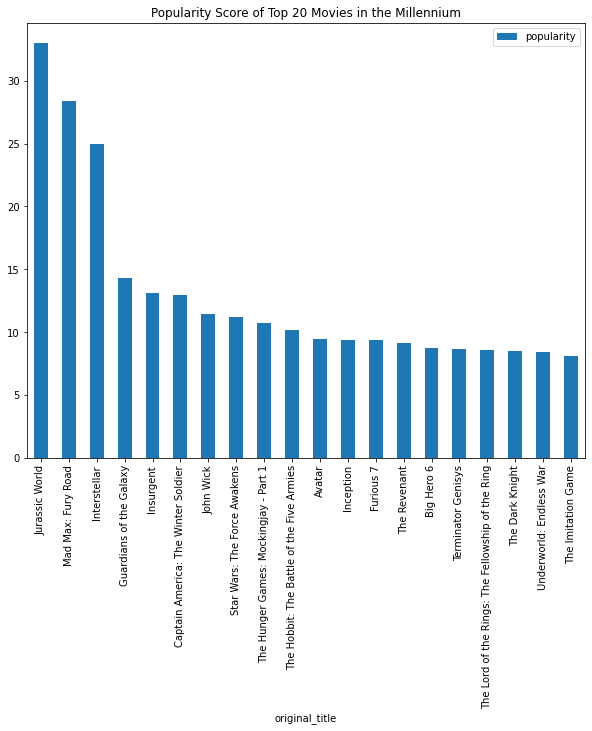

In [14]:
# Top 50 polular genres/movies in the millineum
df_20gm = df[df['release_year']>1999]
df_20gm[['release_year','original_title','genres','popularity']].sort_values(['popularity'],ascending=False).head(20).plot(x='original_title', y='popularity', kind='bar', title = 'Popularity Score of Top 20 Movies in the Millennium', figsize=(10,8))

Top popular genres/movies in the millineum are: **Action|Adventure|Science Fiction|Thriller.**\ **Jurassic world**, released in **2015** was the most popular with a score of **32.985763**

**5. Which are the top-rated movies in the nineties?**

In [15]:
#Top 20 rated movies in the nineties
df_19m_rt = df[df['release_year']<=1999]
df_19m_rt[['release_year','original_title','genres','vote_average']].sort_values(['vote_average'],ascending=False).head(20)

,release_year,original_title,genres,vote_average
8411,1981,Queen - Rock Montreal,Music,8.5
8221,1995,A Personal Journey with Martin Scorsese Throug...,Documentary,8.5
4178,1994,The Shawshank Redemption,Drama|Crime,8.4
7948,1984,Stop Making Sense,Documentary|Music,8.4
9290,1989,Depeche Mode: 101,Music,8.4
8370,1992,Bill Hicks: Relentless,Comedy,8.4
7269,1972,The Godfather,Drama|Crime,8.3
6176,1985,Shoah,Documentary,8.3
9315,1989,For All Mankind,Documentary,8.2
2409,1999,Fight Club,Drama,8.1


<AxesSubplot:title={'center':'Top 20 nineties Movies Average Rating'}, xlabel='original_title'>

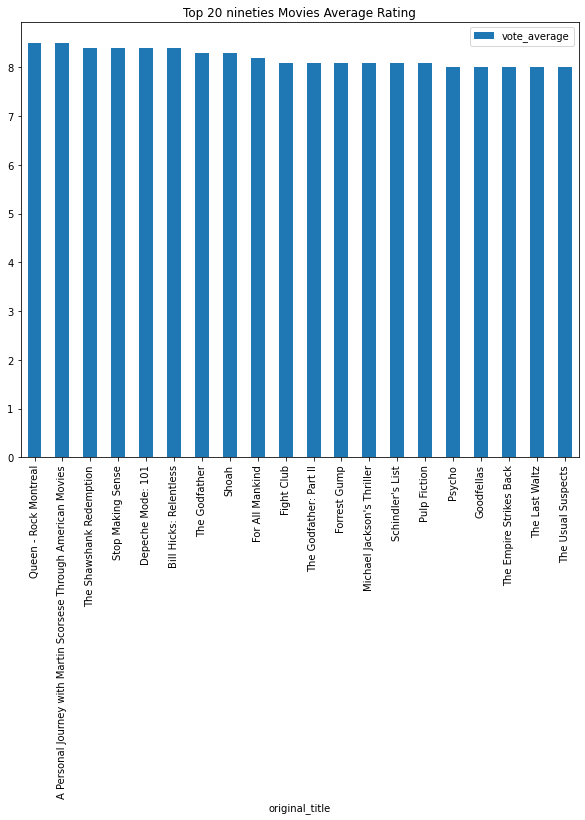

In [16]:
#Bar Chart of Top 20 rated movies in the nineties
df_19Topm_rt = df_19m_rt[['original_title','vote_average']].sort_values(['vote_average'],ascending=False).head(20)
df_19Topm_rt.plot(x='original_title', y='vote_average', kind='bar', title = 'Top 20 nineties Movies Average Rating', figsize=(10,8))

Top rated genres in the nineties are movies of the category: **Documentary, Music, Drama, Crime**. The two most rated movies are; **Queen _ Rock Montreal released in 1981** and **A Personal Journey with Martin Scorsese** released in **1995** both with average rating of **8.5.**

**6. Which are the top-rated movies in the millennnium?**

In [17]:
#Top 20 rated movies in the millenium
df_20m_rt = df[df['release_year']>1999]
df_20m_rt[['release_year','original_title','genres','vote_average']].sort_values(['vote_average'],ascending=False).head(20)

,release_year,original_title,genres,vote_average
3894,2011,The Story of Film: An Odyssey,Documentary,9.2
538,2015,The Mask You Live In,Documentary,8.9
1200,2014,Black Mirror: White Christmas,Drama|Horror|Mystery|Science Fiction|Thriller,8.8
2269,2010,Life Cycles,Documentary,8.8
6911,2006,Pink Floyd: Pulse,Music,8.7
2401,2010,Opeth: In Live Concert At The Royal Albert Hall,Music,8.6
3690,2011,The Art of Flight,Adventure|Documentary,8.5
5830,2013,Doctor Who: The Time of the Doctor,NaN,8.5
8839,2000,Dave Chappelle: Killin' Them Softly,Comedy,8.5
3224,2008,John Mayer: Where the Light Is Live in Los Ang...,Music,8.5


<AxesSubplot:title={'center':' Top 20 Millennium Movies Average Rating'}, xlabel='original_title'>

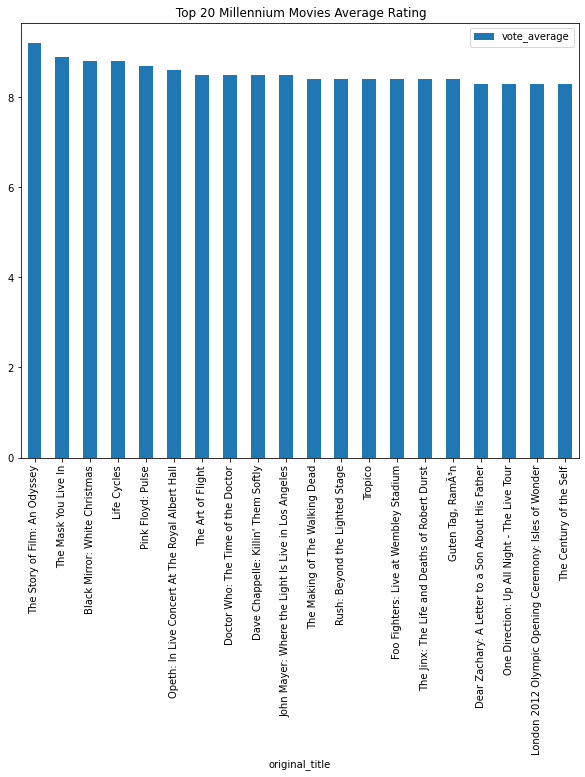

In [18]:
#Bar Chart of Top 20 rated movies in the milennium
df_20Topm_rt = df_20m_rt[['original_title','vote_average']].sort_values(['vote_average'],ascending=False).head(20)
df_20Topm_rt.plot(x='original_title', y='vote_average', kind='bar', title = ' Top 20 Millennium Movies Average Rating', figsize=(10,8))

Top rated movies in the millennium are movies of category: **Drama, Horror, Mystery, Science Fiction, Thriller, Documentary**. The most rated movie of the millennium is **The Story of Film: An Odyssey** released in **2011** with an average rating of **9.2**

**7. Which movie title had the highest budget?**

In [19]:
# Movies with the highest budget
df[['original_title','release_year','budget_adj']].sort_values(['budget_adj'],ascending=False).head()

,original_title,release_year,budget_adj
2244,The Warrior's Way,2010,4.250000e+08
3375,Pirates of the Caribbean: On Stranger Tides,2011,3.683713e+08
7387,Pirates of the Caribbean: At World's End,2007,3.155006e+08
6570,Superman Returns,2006,2.920507e+08
5231,Titanic,1997,2.716921e+08


<AxesSubplot:title={'center':'Top High Budget Movies'}, xlabel='Movie title', ylabel='Budget_adj in Dollars'>

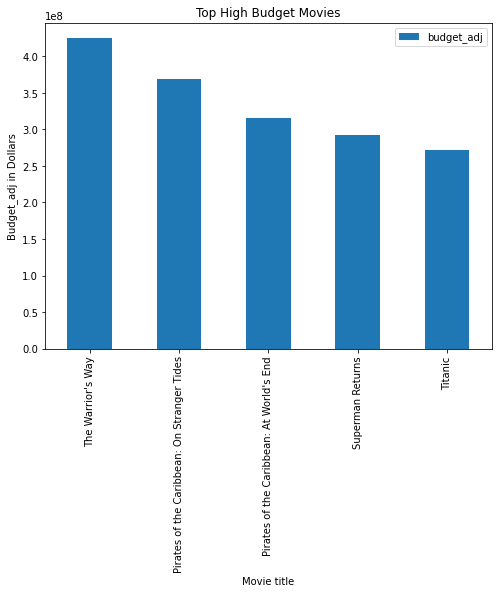

In [20]:
# Barchart of Movies with the highest budget
df[['original_title','release_year','budget_adj']].sort_values(['budget_adj'],ascending=False).head().plot(x='original_title', y='budget_adj', kind='bar', title = 'Top High Budget Movies', ylabel='Budget_adj in Dollars', xlabel='Movie title',figsize=(8,6))

**The Warrior's way**, released in **2010**, was the movie with the highest budget

**8. Which movie title had the highest run time?**

In [21]:
# Movies with the highest runtime
df[['original_title','release_year','runtime']].sort_values(['runtime'],ascending=False).head()

,original_title,release_year,runtime
3894,The Story of Film: An Odyssey,2011,900
4041,Taken,2002,877
2722,Band of Brothers,2001,705
6176,Shoah,1985,566
6181,"North and South, Book I",1985,561


<AxesSubplot:title={'center':'Top High Runtime Movies'}, xlabel='Movie title', ylabel='Runtime in minutes'>

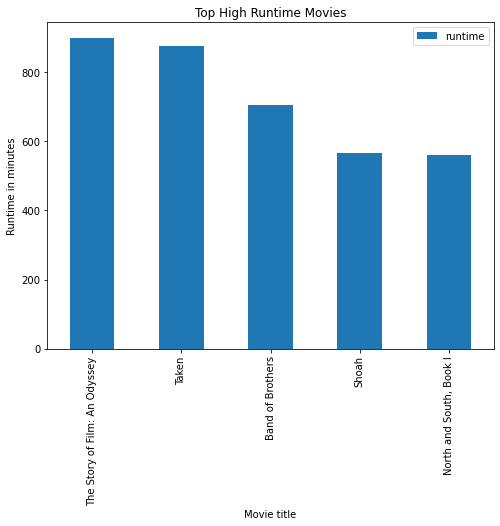

In [22]:
# Movies with the highest runtime
df[['original_title','release_year','runtime']].sort_values(['runtime'],ascending=False).head().plot(x='original_title', y='runtime', kind='bar', title = 'Top High Runtime Movies', xlabel='Movie title', ylabel='Runtime in minutes',figsize=(8,6))

**The Story of Film: An Odyssey** released in **2011** had the highest runtime.

**9.Which movie actors got the highest vote counts?**

In [23]:
# Movie actors with the highest vote counts
df_hmov_act= df[['original_title','release_year','cast', 'vote_count']].sort_values(['vote_count'],ascending=False).head()
df_hmov_act

,original_title,release_year,cast,vote_count
1919,Inception,2010,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,9767
4361,The Avengers,2012,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,8903
1386,Avatar,2009,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,8458
2875,The Dark Knight,2008,Christian Bale|Michael Caine|Heath Ledger|Aaro...,8432
4364,Django Unchained,2012,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|K...,7375


<AxesSubplot:title={'center':'Movie actors with highest vote counts'}, xlabel='Actors', ylabel='Vote counts'>

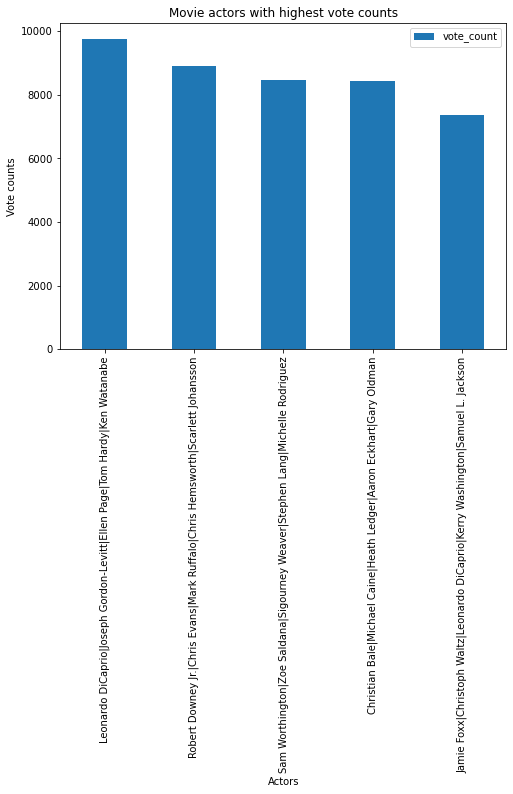

In [24]:
df_hmov_act.plot(x='cast', y='vote_count', kind='bar', title = 'Movie actors with highest vote counts', xlabel='Actors', ylabel='Vote counts',figsize=(8,6))

The movie actors with the highest vote counts are **Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Tom Hardy, Ken Wantanabae.**

**10. How is revenue trending over the period of time?**

<AxesSubplot:title={'center':'Revenue Trend Overtime'}, xlabel='Year', ylabel='Revenue'>

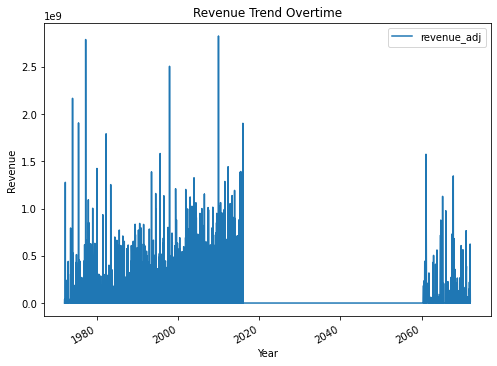

In [25]:
# revenue trending over the period of time.
df['release_date'] = pd.to_datetime(df['release_date'])
df.plot('release_date', 'revenue_adj', xlabel='Year', ylabel='Revenue', title= 'Revenue Trend Overtime', figsize=(8,6))

Revenue does not seem to follow a particular trend.

**11. How runtime trends overtime?**

<AxesSubplot:title={'center':'Runtime Trend Overtime'}, xlabel='Date', ylabel='Runtime'>

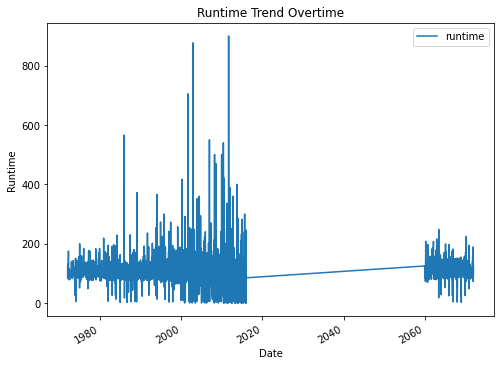

In [26]:
# runtime trending over the period of time.
df.plot('release_date', 'runtime', xlabel='Date', ylabel='Runtime', title= 'Runtime Trend Overtime', figsize=(8,6))

It can be seen that runtime increased over the years.

**12. Do top ratings movies always generate big revenue?**

In [27]:
#calculation total profit revenue from movie
df['total_revenue']  = df['revenue_adj'] - df['budget_adj']

<AxesSubplot:title={'center':'Effect of Average Rating on Revenue'}, xlabel='vote_average', ylabel='total_revenue'>

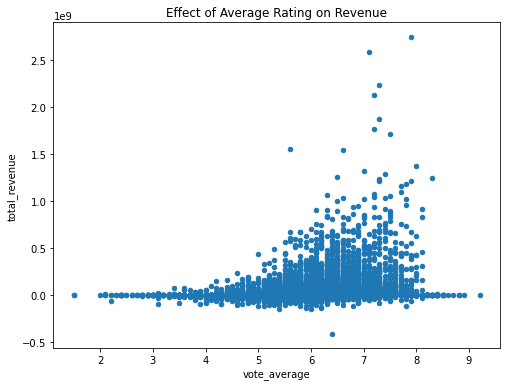

In [28]:
# Effect of average rating on revenue
df.plot(kind='scatter', x='vote_average', y='total_revenue', title= 'Effect of Average Rating on Revenue', figsize=(8,6))

As seen from the plot, there is a relationship between movie rating and revenue. Top rated movies generate high revenue.

**13. Do higher budget movies always generate big revenue?**

In [29]:
df[['original_title','release_year','budget_adj', 'total_revenue']].sort_values(['budget_adj'],ascending=False)

,original_title,release_year,budget_adj,total_revenue
2244,The Warrior's Way,2010,4.250000e+08,-4.139124e+08
3375,Pirates of the Caribbean: On Stranger Tides,2011,3.683713e+08,6.220462e+08
7387,Pirates of the Caribbean: At World's End,2007,3.155006e+08,6.951529e+08
6570,Superman Returns,2006,2.920507e+08,1.309698e+08
5231,Titanic,1997,2.716921e+08,2.234714e+09
...,...,...,...,...
1184,Dans la cour,2014,0.000000e+00,0.000000e+00
1185,Crawl or Die,2014,0.000000e+00,0.000000e+00
7003,Scooby-Doo 2: Monsters Unleashed,2004,0.000000e+00,2.094936e+08
1186,Red Army,2014,0.000000e+00,0.000000e+00


<AxesSubplot:title={'center':'Effect of Budget on Revenue'}, xlabel='budget_adj', ylabel='total_revenue'>

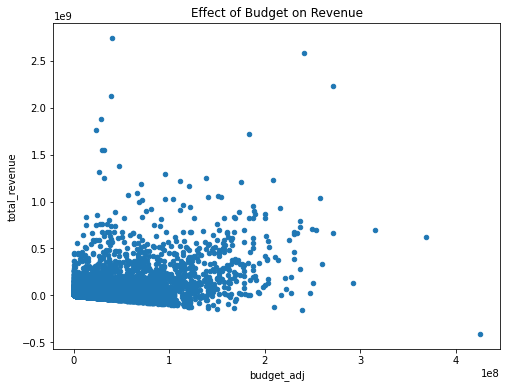

In [30]:
# Effect of Budget on Revenue
df.plot(kind='scatter', x='budget_adj', y='total_revenue', title= 'Effect of Budget on Revenue', figsize=(8,6))

High budget movies generate high revenue.

 **14. What movies generates big revenues?**

In [31]:
# Top 20 movies of high revenue
top_rev=df[['genres','original_title','release_year','vote_average','production_companies','director','budget_adj','total_revenue','revenue_adj']].sort_values(['total_revenue'],ascending=False).head(20)
top_rev

,genres,original_title,release_year,vote_average,production_companies,director,budget_adj,total_revenue,revenue_adj
1329,Adventure|Action|Science Fiction,Star Wars,1977,7.9,Lucasfilm|Twentieth Century Fox Film Corporation,George Lucas,3.957559e+07,2.750137e+09,2.789712e+09
1386,Action|Adventure|Fantasy|Science Fiction,Avatar,2009,7.1,Ingenious Film Partners|Twentieth Century Fox ...,James Cameron,2.408869e+08,2.586237e+09,2.827124e+09
5231,Drama|Romance|Thriller,Titanic,1997,7.3,Paramount Pictures|Twentieth Century Fox Film ...,James Cameron,2.716921e+08,2.234714e+09,2.506406e+09
10594,Drama|Horror|Thriller,The Exorcist,1973,7.2,Warner Bros.|Hoya Productions,William Friedkin,3.928928e+07,2.128036e+09,2.167325e+09
9806,Horror|Thriller|Adventure,Jaws,1975,7.3,Universal Pictures|Zanuck/Brown Productions,Steven Spielberg,2.836275e+07,1.878643e+09,1.907006e+09
8889,Science Fiction|Adventure|Family|Fantasy,E.T. the Extra-Terrestrial,1982,7.2,Universal Pictures|Amblin Entertainment,Steven Spielberg,2.372625e+07,1.767968e+09,1.791694e+09
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,2015,7.5,Lucasfilm|Truenorth Productions|Bad Robot,J.J. Abrams,1.839999e+08,1.718723e+09,1.902723e+09
8094,Crime|Drama|Mystery|Thriller|Action,The Net,1995,5.6,Columbia Pictures,Irwin Winkler,3.148127e+07,1.551568e+09,1.583050e+09
10110,Adventure|Animation|Comedy|Family,One Hundred and One Dalmatians,1961,6.6,Walt Disney Productions,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,2.917944e+07,1.545635e+09,1.574815e+09
7309,Adventure|Action|Science Fiction,The Empire Strikes Back,1980,8.0,Lucasfilm|Twentieth Century Fox Film Corporation,Irvin Kershner,4.762866e+07,1.376998e+09,1.424626e+09


<AxesSubplot:title={'center':'Top 20 High Revenue Movies'}, xlabel='original_title'>

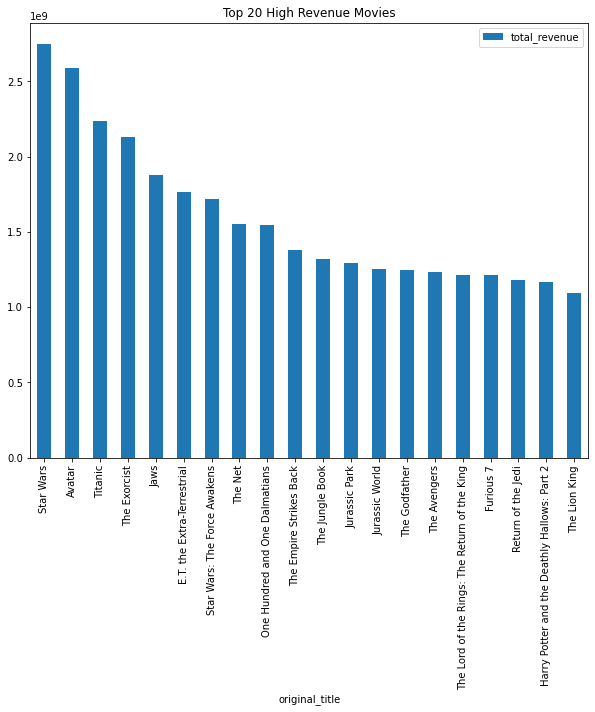

In [32]:
# Bar Chart Top 20 movies of high profit revenue
top_rev.plot(x='original_title', y='total_revenue', kind='bar', title = 'Top 20 High Revenue Movies', figsize=(10,8))

The movies that generated high revenues were **highly rated** and are of genres: **Action, Adventure, Fantasy, Science Fiction**. They are also highly budgeted. Star Wars was the movie that generated the biggest revenue

**15. Can we provide a list of directors that generates big revenue?**

In [33]:
# value counts of directors from top 20 high profit revenue movies
top_rev['director'].value_counts()

Steven Spielberg                                     3
James Cameron                                        2
George Lucas                                         1
Francis Ford Coppola                                 1
David Yates                                          1
Richard Marquand                                     1
James Wan                                            1
Peter Jackson                                        1
Joss Whedon                                          1
Wolfgang Reitherman                                  1
Colin Trevorrow                                      1
Irvin Kershner                                       1
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1
Irwin Winkler                                        1
J.J. Abrams                                          1
William Friedkin                                     1
Roger Allers|Rob Minkoff                             1
Name: director, dtype: int64

**Steven Spielberg** and **James Cameron** are directors that generates big revenue

**16. Can we provide a list of production company that generates big revenue?**

In [34]:
# value counts of production companies of top 20 high income revenue movies
top_rev['production_companies'].value_counts()

Lucasfilm|Twentieth Century Fox Film Corporation                                                              3
Universal Pictures|Amblin Entertainment                                                                       2
Walt Disney Pictures                                                                                          1
Warner Bros.|Heyday Films|Moving Picture Company (MPC)                                                        1
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films                                   1
WingNut Films|New Line Cinema                                                                                 1
Marvel Studios                                                                                                1
Paramount Pictures|Alfran Productions                                                                         1
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu                

Most of the movies that generated high income were produced by **Lucasfilm, Twentieth Century Fox Film Corporation, Universal Pictures, Walt Disney, Paramount pictures, Warner Bros., Columbia pictures** among others.

# Conclusion

The following were deduced from the dataset;

The most frequent genres were Comedy and Drama with a count of 712.\
The popular genres all the time are Action|Adventure|Science Fiction|Thriller movies. Jurassic world was the most popular with a score of 32.985763.\
The two most rated movies in the nineties were; Queen _Rock Montreal released in 1981 and A Personal Journey with Martin Scorsese released in 1995 both with average rating of 8.5.\
The most rated movie of the millennium is The Story of Film: An Odyssey released in 2011 with an average rating of 9.2\
The Warrior's way was the movie with the highest budget\
The Story of Film: An Odyssey released in 2011 had the highest runtime.\
The movie actors with the highest vote counts are Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Tom Hardy, Ken Wantanabae.\
Revenue does not seem to follow a particular trend.\
It can be seen that runtime increased over the years.\
There is a correlation between movie rating and revenue. Top rated movies generate high revenue.\
High budget movies generate high revenue.\
Star Wars was the movie that generated the biggest revenue.\
Steven Spielberg and James Cameron are directors that generates big revenue.\
Most of the movies that generated high income were produced by Lucasfilm, Twentieth Century Fox Film Corporation, Universal Pictures, Walt Disney, Paramount pictures, Warner Bros., Columbia pictures among others.

**Limitation of the dataset**: There are columns with more than 50% missing values e.g. homepage column. The release_date column has some erroneous values.